# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

# load the data
data = load_boston()

X = pd.DataFrame(data["data"], 
                 columns=data["feature_names"])

y = pd.DataFrame(data["target"], 
                 columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                   random_state=2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# import the model
lm = LinearRegression()

# fit the train data
lm.fit(X_train, y_train)

# predict y_pred based on X_test values
y_pred = lm.predict(X_test)

# predict the train
y_pred_train = lm.predict(X_train)

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def lm(x, y, njobs=1, normalize=True, fit_intercept=False):
    # calling train test split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    # import the model
    lm = LinearRegression(njobs, normalize)
    # fit the train data
    lm.fit(X_train, y_train)
    # predict values
    y_pred = lm.predict(X_test)
    # ERRORS
    # r2 score
    r2 = round((r2_score(y_test, y_pred)*100),2)
    # mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    # mean_absolute_error
    mae = mean_absolute_error(y_test, y_pred)
    # create a dataframe
    df_error = pd.DataFrame([r2, mse, mae])
    df_error.index = ['r2', 'MSE', 'MAE']
    return(df_error)

In [10]:
m1 = lm(X_train, y_train, njobs=1, normalize=True, fit_intercept=False)
m2 = lm(X_train, y_train, njobs=1000, normalize=False, fit_intercept=True)
df_metrics = pd.concat([m1, m2], axis=1)
df_metrics.columns = ['model1', 'model2']
df_metrics

,model1,model2
r2,61.180000,61.180000
MSE,29.908872,29.908872
MAE,3.694496,3.694496


## 3. Calculate and print R-squared for both the training and the testing set.

How to read R2 coefficient? 
* Determines how well the regression predictions approximate to the real data points
> R2 score varies from 0 to 1: 0 is a poor fitting, and 1 the best fitting
In other words:
>> * 0% indicates that the model explains none of the variability of the response data around its mean.
>> * 100% indicates that the model explains all the variability of the response data around its mean.

Source('https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

In [11]:
r2_score(y_test, y_pred)

0.7789207451814436

In [12]:
r2_score(y_train, y_pred_train)

0.7285831776605591

## 4. Calculate and print mean squared error for both the training and the testing set.

In [13]:
mean_squared_error(y_test, y_pred)

18.49542012244824

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [14]:
mean_absolute_error(y_test, y_pred)

3.1130437468933985

## Classification Model Evaluation

In [15]:
from sklearn.datasets import load_iris

data = load_iris()

X2 = pd.DataFrame(data["data"], columns=data["feature_names"])
y2 = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X2, y2], axis=1)

In [16]:
y2['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, 
                                                        test_size=0.2,
                                                       random_state=1)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [20]:
from sklearn.linear_model import LogisticRegression

* The next questions could be answered by aggregating the metrics into a single table with the following scores:
> * accuracy_score
> * balanced_accuracy_score
> * precision_score
> * recall_score
> * f1_score

* Let's create 3 models and compare their metrics:

In [56]:
# MODEL 1
# import the model without any hyperparameter
lr = LogisticRegression()

# fit the model
lr.fit(X_train2, y_train2)

# predict the model with test values
y_pred_lr = lr.predict(X_test2)

# predict the model with train
y_pred_lr_train = lr.predict(X_train2)

In [57]:
# MODEL 2
# import the model with solver hyperparameter
lr2 = LogisticRegression(solver='lbfgs')

# fit the model
lr2.fit(X_train2, y_train2)

# predict the model with test values
y_pred_lr2 = lr2.predict(X_test2)

# predict the model with train
y_pred_lr_train2 = lr2.predict(X_train2)

In [58]:
# MODEL 3
# import the model with solver and multi_class hyperparameter
lr3 = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# fit the model
lr3.fit(X_train2, y_train2)

# predict the model with test values
y_pred_lr3 = lr3.predict(X_test2)

# predict the model with train
y_pred_lr_train2 = lr3.predict(X_train2)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def errors_log_func(y_test, y_pred):
    # ERRORS
    # accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # balanced accuracy
    b_accuracy = balanced_accuracy_score(y_test, y_pred)
    # precision
    precision_nome = precision_score(y_test, y_pred, average=None)
    precision_micro = precision_score(y_test, y_pred, average='micro')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    # recall
    recall_none = recall_score(y_test, y_pred, average=None)
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    recall_micro = recall_score(y_test, y_pred, average='micro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    # f1_score
    f1_score_none = f1_score(y_test, y_pred, average=None)
    f1_score_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_score_micro = f1_score(y_test, y_pred, average='micro')
    f1_score_macro = f1_score(y_test, y_pred, average='macro')
    # concat the calculated metrics
    df_error = pd.DataFrame([accuracy, b_accuracy, precision_nome, precision_micro, precision_macro, precision_weighted,
                            recall_none, recall_weighted, recall_micro, recall_macro, f1_score_none, 
                             f1_score_weighted, f1_score_micro, f1_score_macro])
    
    df_error = df_error.T
    df_error.columns = ['accuracy', 'balance_accuracy', 'precision_nome', 'precision_micro', 'precision_macro', 'precision_weighted',
        'recall_none', 'recall_weighted', 'recall_micro', 'recall_macro', 'f1_score_none', 
        'f1_score_weighted', 'f1_score_micro', 'f1_score_macro']
    df_error = df_error.T
    return(df_error)

In [62]:
# call the function and 
m1_log = errors_log_func(y_test2, y_pred_lr)
m2_log = errors_log_func(y_test2, y_pred_lr2)
m3_log = errors_log_func(y_test2, y_pred_lr3)

# concat all the function results
df_error_log = pd.concat([m1_log, m2_log, m3_log], axis=1)
# rename columns
df_error_log.columns = ['model1', 'model2_lbfgs', 'model3_lbfgs_multinomial']

In [63]:
# table metrics
df_error_log

,model1,model2_lbfgs,model3_lbfgs_multinomial
accuracy,0.833333,0.866667,0.966667
balance_accuracy,0.871795,0.897436,0.974359
precision_nome,"[1.0, 1.0, 0.5454545454545454]","[1.0, 1.0, 0.6]","[1.0, 1.0, 0.8571428571428571]"
precision_micro,0.833333,0.866667,0.966667
precision_macro,0.848485,0.866667,0.952381
precision_weighted,0.909091,0.92,0.971429
recall_none,"[1.0, 0.6153846153846154, 1.0]","[1.0, 0.6923076923076923, 1.0]","[1.0, 0.9230769230769231, 1.0]"
recall_weighted,0.833333,0.866667,0.966667
recall_micro,0.833333,0.866667,0.966667
recall_macro,0.871795,0.897436,0.974359


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [34]:
accuracy_score(y_test2, y_pred_lr)

0.8333333333333334

In [38]:
accuracy_score(y_train2, y_pred_lr_train)

0.9583333333333334

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [39]:
balanced_accuracy_score(y_test2, y_pred_lr)

0.8717948717948718

In [40]:
balanced_accuracy_score(y_train2, 
                        y_pred_lr_train)

0.954954954954955

## 10. Calculate and print the precision score for both the training and the testing set.

In [41]:
precision_score(y_test2, y_pred_lr, average='weighted')

0.9090909090909091

In [42]:
precision_score(y_test2, y_pred_lr, average='macro')

0.8484848484848485

In [43]:
precision_score(y_test2, y_pred_lr, average='micro')

0.8333333333333334

In [44]:
precision_score(y_test2, y_pred_lr, average=None)

array([1.        , 1.        , 0.54545455])

## 11. Calculate and print the recall score for both the training and the testing set.

In [45]:
recall_score(y_test2, y_pred_lr, average=None)

array([1.        , 0.61538462, 1.        ])

In [46]:
recall_score(y_test2, y_pred_lr, average=None)

array([1.        , 0.61538462, 1.        ])

## 12. Calculate and print the F1 score for both the training and the testing set.

In [47]:
f1_score(y_test2, y_pred_lr, average=None)

array([1.        , 0.76190476, 0.70588235])

In [48]:
f1_score(y_test2, y_pred_lr,average=None)

array([1.        , 0.76190476, 0.70588235])

## 13. Generate confusion matrices for both the training and the testing set.

In [50]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test2, y_pred_lr)

<Figure size 432x288 with 0 Axes>

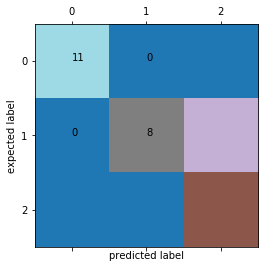

In [51]:
plt.figure()
plt.matshow(cnf_matrix, cmap='tab20')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, cnf_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [54]:
cnf_matrix2 = confusion_matrix(y_test2, y_pred_lr)

<Figure size 432x288 with 0 Axes>

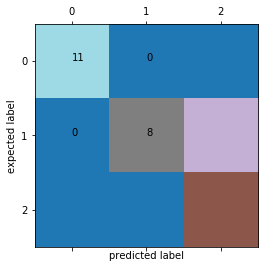

In [55]:
plt.figure()
plt.matshow(cnf_matrix, cmap='tab20')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, cnf_matrix2[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()